In [3]:
# ==============================
# PROBLEM 3a
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Housing.csv")

# Features for Problem 3a (same as Problem 2a)
features_3a = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X = df[features_3a].values.astype(float)
y = df["price"].values.astype(float)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize inputs (best scaling from 2a)
mean_vals = X_train.mean(axis=0)
std_vals = X_train.std(axis=0)
X_train_std = (X_train - mean_vals) / std_vals
X_val_std = (X_val - mean_vals) / std_vals

# Add bias
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

X_train_b = add_bias(X_train_std)
X_val_b = add_bias(X_val_std)


In [4]:
def gradient_descent_penalty(X_train, y_train, X_val, y_val, lr=0.05, n_iter=500, lam=0.1):
    m, n = X_train.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []

    for i in range(n_iter):
        # Predictions
        y_pred = X_train @ theta
        error = y_pred - y_train

        # Gradient with penalty (L2 regularization)
        grad = (2/m) * (X_train.T @ error) + 2 * lam * theta
        grad[0] -= 2 * lam * theta[0]   # don’t penalize bias term

        # Update
        theta -= lr * grad

        # Training loss (with penalty)
        train_loss = np.mean((X_train @ theta - y_train) ** 2) + lam * np.sum(theta[1:]**2)

        # Validation loss (no penalty)
        val_loss = np.mean((X_val @ theta - y_val) ** 2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses


In [5]:
# Run with penalty
theta_pen, train_pen, val_pen = gradient_descent_penalty(
    X_train_b, y_train, X_val_b, y_val, lr=0.05, n_iter=500, lam=0.1
)

# Compare against standardization results from Problem 2a
# (re-run without penalty for clean comparison)
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.05, n_iter=500):
    m, n = X_train.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []
    for i in range(n_iter):
        y_pred = X_train @ theta
        error = y_pred - y_train
        grad = (2/m) * (X_train.T @ error)
        theta -= lr * grad
        train_loss = np.mean((X_train @ theta - y_train) ** 2)
        val_loss = np.mean((X_val @ theta - y_val) ** 2)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    return theta, train_losses, val_losses

theta_std, train_std, val_std = gradient_descent(
    X_train_b, y_train, X_val_b, y_val, lr=0.05, n_iter=500
)


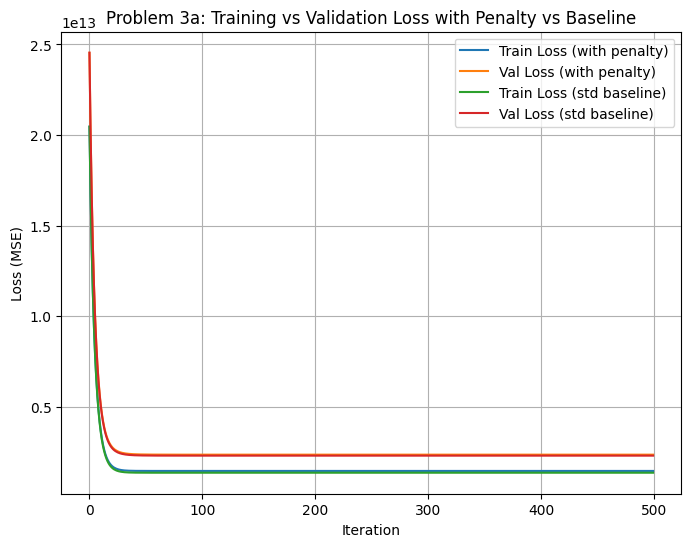

In [6]:
plt.figure(figsize=(8,6))
plt.plot(train_pen, label="Train Loss (with penalty)")
plt.plot(val_pen, label="Val Loss (with penalty)")
plt.plot(train_std, label="Train Loss (std baseline)")
plt.plot(val_std, label="Val Loss (std baseline)")
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Problem 3a: Training vs Validation Loss with Penalty vs Baseline")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
print("With Penalty:")
print("Final Parameters:", theta_pen)
print("Final Training Loss:", train_pen[-1])
print("Final Validation Loss:", val_pen[-1])
print("="*60)

print("Standardization Baseline (2a):")
print("Final Parameters:", theta_std)
print("Final Training Loss:", train_std[-1])
print("Final Validation Loss:", val_std[-1])


With Penalty:
Final Parameters: [4706527.3853211   625401.69771766  137049.27662665  525298.48219192
  392110.8562572   284363.0540677 ]
Final Training Loss: 1448627285468.954
Final Validation Loss: 2347404870112.599
Standardization Baseline (2a):
Final Parameters: [4706527.3853211   680058.42414123  112973.18562913  565408.61793599
  424354.8117635   288348.7726677 ]
Final Training Loss: 1350008211326.5803
Final Validation Loss: 2292721545725.3696
